# Libary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
from pandas_profiling import ProfileReport

#### Sklearn import

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

# Load Data

In [27]:
print(os.listdir('D:/Data center/Kaggle/GiveMeSomeCredit/'))

['cs-test.csv', 'cs-training.csv', 'Data Dictionary.xls', 'GiveMeSomeCredit.zip', 'pd_profilling_report.html', 'sampleEntry.csv']


In [28]:
cs_training = pd.read_csv('D:/Data center/Kaggle/GiveMeSomeCredit/cs-training.csv')
cs_test = pd.read_csv('D:/Data center/Kaggle/GiveMeSomeCredit/cs-test.csv')

# EDA

In [6]:
cs_training.info()
cs_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
cs_training

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [8]:
cs_training.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
profile = ProfileReport(cs_training, title  = "Pandas Profiling Report")

In [9]:
profile.to_file("D:/Data center/Kaggle/GiveMeSomeCredit/pd_profilling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Code\envs\py39sklearn\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


KeyboardInterrupt: 

In [14]:
def missing_values_table(df):
    '''a function that return missing values of a data frame'''
    # Total missing values
    miss_val = df.isnull().sum()
    # Percentage of missing values
    miss_val_percent = 100*miss_val/len(df)
    # Make a table with the results
    mis_val_table = pd.concat([miss_val,miss_val_percent],axis =1)
    mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    #Make a table of columns that contain missing values and sort it in descending order
    mis_val_table = mis_val_table = mis_val_table.sort_values(by = ['% of Total Values'],ascending = False)
    mis_val_table_columns = mis_val_table[mis_val_table['% of Total Values'] != 0]
    # Print the result
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_columns.shape[0]) +
              " columns that have missing values.")
     # Return the dataframe with missing information
    return mis_val_table_columns

In [15]:
missing_values_table(cs_training)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
MonthlyIncome,29731,19.820667
NumberOfDependents,3924,2.616000


In [12]:
#inspect the bull samples
cs_training[cs_training.isnull().any(axis =1)].head(20)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
52,53,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
58,59,0,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0
62,63,0,0.101156,72,0,1720.0,NaN,12,0,2,0,0.0
71,72,0,0.142013,67,0,1824.0,NaN,7,0,2,0,0.0
86,87,0,0.360510,58,1,3282.0,NaN,8,0,2,0,0.0


### RevolvingUtilizationOfUnsecuredLines feature

In [29]:
cs_training['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

<AxesSubplot:ylabel='Frequency'>

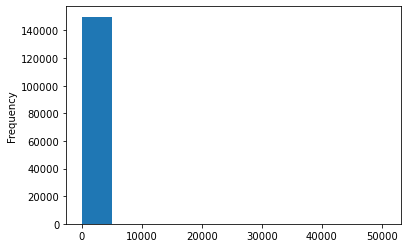

In [30]:
cs_training['RevolvingUtilizationOfUnsecuredLines'].plot.hist()

==> there might be invalid datas with RevolvingUtilizationOfUnsecuredLines value > 1

<AxesSubplot:ylabel='Frequency'>

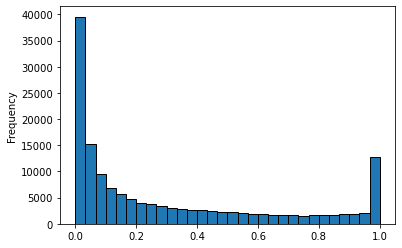

In [31]:
cs_training[cs_training['RevolvingUtilizationOfUnsecuredLines']<1]['RevolvingUtilizationOfUnsecuredLines'].plot.hist(edgecolor = "k",bins = 30)

==> the histogram look much better

In [32]:
print('Base default risk for train data','{:2%}'.format(cs_training['SeriousDlqin2yrs'].value_counts().iloc[1]/
      cs_training['SeriousDlqin2yrs'].value_counts().iloc[0]))

Base default risk for train data 7.162759%


In [33]:
print('Default risk for valid RevolvingUtilizationOfUnsecuredLines data:', '{:2%}'.format(cs_training[cs_training['RevolvingUtilizationOfUnsecuredLines']<=1]['SeriousDlqin2yrs'].value_counts().iloc[1]/
cs_training[cs_training['RevolvingUtilizationOfUnsecuredLines']<=1]['SeriousDlqin2yrs'].value_counts().iloc[0]))

Default risk for valid RevolvingUtilizationOfUnsecuredLines data: 6.373921%


In [34]:
print('Default risk for invalid RevolvingUtilizationOfUnsecuredLines data:', '{:2%}'.format(cs_training[cs_training['RevolvingUtilizationOfUnsecuredLines']>1]['SeriousDlqin2yrs'].value_counts().iloc[1]/
cs_training[cs_training['RevolvingUtilizationOfUnsecuredLines']>1]['SeriousDlqin2yrs'].value_counts().iloc[0]))

Default risk for invalid RevolvingUtilizationOfUnsecuredLines data: 59.357006%


 ==> the invalid datas have higher default risk than the valid ones

In [35]:
cs_training['RevolvingUtilizationOfUnsecuredLines_invalid'] = 0

In [36]:
#check the quantile of the feature
q1, q3 = cs_training['RevolvingUtilizationOfUnsecuredLines'].quantile([0.25,0.75])
q3, q1

(0.5590462475, 0.029867442)

In [37]:
iqr = q3 - q1
print('IQR: ',iqr)

IQR:  0.5291788055


In [38]:
#create a new column named RevolvingUtilizationOfUnsecuredLines_invalid to mark invalid value
cs_training.loc[cs_training['RevolvingUtilizationOfUnsecuredLines']>1,'RevolvingUtilizationOfUnsecuredLines_invalid'] = 1
cs_test.loc[cs_training['RevolvingUtilizationOfUnsecuredLines']>1,'RevolvingUtilizationOfUnsecuredLines_invalid'] = 1
#set invalid 'RevolvingUtilizationOfUnsecuredLines' value to nan
cs_training.loc[cs_training['RevolvingUtilizationOfUnsecuredLines']>1,'RevolvingUtilizationOfUnsecuredLines'] = np.nan
cs_test.loc[cs_training['RevolvingUtilizationOfUnsecuredLines']>1,'RevolvingUtilizationOfUnsecuredLines'] = np.nan

### DebtRatio Feature

<AxesSubplot:>

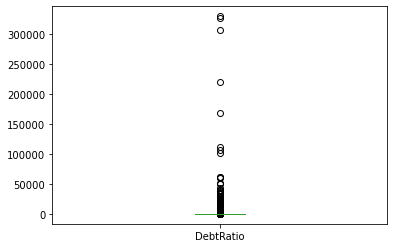

In [39]:
cs_training['DebtRatio'].plot.box()

==> many outliners to the upside

In [40]:
q1, q3 = cs_training['DebtRatio'].quantile([0.25,0.75])
q3, q1

(0.86825377325, 0.17507383225)

In [41]:
iqr = q3 - q1
print('IQR: ',iqr)

IQR:  0.6931799409999999


In [42]:
# Bin the age data
cs_training['DebtRatio_bins'] = pd.qcut(cs_training['DebtRatio'],q = 20)
cs_training['DebtRatio_bins']

0             (0.649, 0.868]
1            (0.0864, 0.134]
2           (0.0309, 0.0864]
3           (0.0309, 0.0864]
4          (0.00433, 0.0309]
                 ...        
149995        (0.214, 0.251]
149996        (0.649, 0.868]
149997    (2449.0, 329664.0]
149998     (-0.001, 0.00433]
149999        (0.214, 0.251]
Name: DebtRatio_bins, Length: 150000, dtype: category
Categories (20, interval[float64, right]): [(-0.001, 0.00433] < (0.00433, 0.0309] < (0.0309, 0.0864] < (0.0864, 0.134] ... (4.0, 269.15] < (269.15, 1267.0] < (1267.0, 2449.0] < (2449.0, 329664.0]]

<AxesSubplot:ylabel='DebtRatio_bins'>

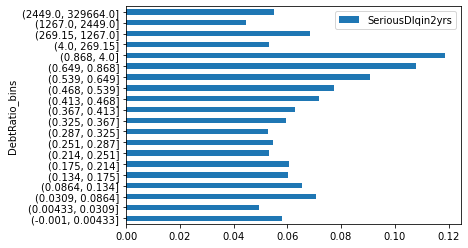

In [43]:
cs_training.groupby('DebtRatio_bins').mean().plot.barh(y = 'SeriousDlqin2yrs')

 ==> there is no clear relation between outlier debratio and the target

## Preprocessing


In [44]:
X = cs_training.drop(labels = ['Unnamed: 0','SeriousDlqin2yrs'],axis =1)
y = cs_training['SeriousDlqin2yrs']
#cat.code for DebtRatio_bins in order to use LGBM
X['DebtRatio_bins'] = X['DebtRatio_bins'].cat.codes
X['DebtRatio_bins'] = X['DebtRatio_bins'].astype('category')

In [45]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_invalid,DebtRatio_bins
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0,14
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,3
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0,2
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,2
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0,6
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0,14
149997,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,0,19
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=314)

In [47]:
X_train.dtypes

RevolvingUtilizationOfUnsecuredLines             float64
age                                                int64
NumberOfTime30-59DaysPastDueNotWorse               int64
DebtRatio                                        float64
MonthlyIncome                                    float64
NumberOfOpenCreditLinesAndLoans                    int64
NumberOfTimes90DaysLate                            int64
NumberRealEstateLoansOrLines                       int64
NumberOfTime60-89DaysPastDueNotWorse               int64
NumberOfDependents                               float64
RevolvingUtilizationOfUnsecuredLines_invalid       int64
DebtRatio_bins                                  category
dtype: object

In [48]:
categorical = (X_train.dtypes == object) |(X_train.dtypes == 'category')

In [49]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
preprocess_no_scaler = make_column_transformer((imp_mean,~categorical),(OneHotEncoder(handle_unknown = "ignore"), categorical))

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rdf = make_pipeline(preprocess_no_scaler,RandomForestClassifier(n_estimators = 200,random_state = 10, max_depth = 5,
                                                                min_samples_leaf = 2,min_samples_split =2, verbose = 0, n_jobs = -1))

In [52]:
rdf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  RevolvingUtilizationOfUnsecuredLines             True
age                                              True
NumberOfTime30-59DaysPastDueNotWorse             True
DebtRatio                                        True
MonthlyIncome                                    True
NumberOfOpenCreditLinesAndLoans                  True
NumberOfTimes90DaysLate                          True
NumberRealEstateLoansOrLines                     True
NumberOfTime60-89DaysPastDueNotWorse             T...
NumberOfOpenCreditLinesAndLoans                 False
NumberOfTimes90DaysLate                         False
NumberRealEstateLoansOrLines                    False
NumberOfTime60-89DaysPastDueNotWorse            False
NumberOfDependents                              False
RevolvingUtilizationOfUnsecuredLines_invalid    False
DebtRatio_bins                                   True
dtype: bool)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=10))])

[[27965    30]
 [ 1948    57]]
0.9340666666666667


C:\Code\envs\py39sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27995
           1       0.66      0.03      0.05      2005

    accuracy                           0.93     30000
   macro avg       0.80      0.51      0.51     30000
weighted avg       0.92      0.93      0.90     30000



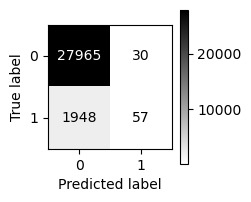

In [49]:
y_pred = rdf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(rdf.score(X_test,y_test))
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(rdf, X_test, y_test, cmap='gray_r', ax=ax)
print(classification_report(y_test, y_pred))


roc_auc_score: 0.8542643747837051


C:\Code\envs\py39sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


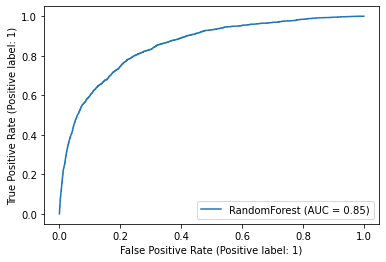

In [53]:
y_hat = rdf.predict_proba(X_test)[:,1]
print('roc_auc_score:',roc_auc_score(y_test,y_hat))
plot_roc_curve(rdf, X_test, y_test, name='RandomForest')

In [54]:
roc_cureve_df = pd.DataFrame(roc_curve(y_test,y_hat))
fpr, tpr, thresholds = roc_curve(y_test,y_hat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr*(1-fpr))
ix = np.argmax(gmeans)
print('Best thresh hold: {} , best G-Mean: {},'.format(thresholds[ix],gmeans[ix]))

Best thresh hold: 0.0655350363432841 , best G-Mean: 0.778768266929023,


In [56]:
from sklearn.metrics import recall_score
y_pred = rdf.predict_proba(X_test)[:,1] > thresholds[ix]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(f'In conlusion, the best threshold is {round(thresholds[ix],3)}, at which level the recall rate is {round(recall_score(y_test, y_pred),3)}')

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     27995
           1       0.20      0.78      0.32      2005

    accuracy                           0.78     30000
   macro avg       0.59      0.78      0.59     30000
weighted avg       0.93      0.78      0.83     30000

[[21738  6257]
 [  440  1565]]
In conlusion, the best threshold is 0.066, at which level the recall rate is 0.781


## LGBM

In [67]:
import lightgbm as lgb


In [68]:
for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
       X[c] = X[c].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines          146679 non-null  float64 
 1   age                                           150000 non-null  int64   
 2   NumberOfTime30-59DaysPastDueNotWorse          150000 non-null  int64   
 3   DebtRatio                                     150000 non-null  float64 
 4   MonthlyIncome                                 120269 non-null  float64 
 5   NumberOfOpenCreditLinesAndLoans               150000 non-null  int64   
 6   NumberOfTimes90DaysLate                       150000 non-null  int64   
 7   NumberRealEstateLoansOrLines                  150000 non-null  int64   
 8   NumberOfTime60-89DaysPastDueNotWorse          150000 non-null  int64   
 9   NumberOfDependents                   

In [69]:
X_train['DebtRatio_bins']

19453      8
76025     19
60655     17
145647    18
75842     10
          ..
118542    19
82352      5
11186      1
31963      6
134765    13
Name: DebtRatio_bins, Length: 120000, dtype: category
Categories (20, int64): [0, 1, 2, 3, ..., 16, 17, 18, 19]

In [70]:
fit_params={"early_stopping_rounds":20, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto' 
           }
clf = lgb.LGBMClassifier(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)

In [71]:
clf.fit(X_train, y_train, **fit_params)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[100]	valid's auc: 0.860795


LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=314, silent=True, subsample=0.9)

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.


Text(0.5, 1.0, 'ROC AUC Curve')

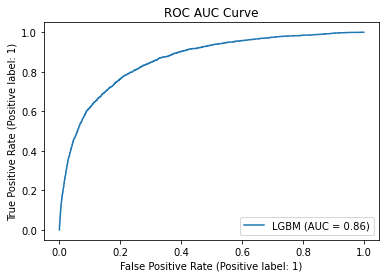

In [74]:
plot_roc_curve(clf, X_test, y_test, name='LGBM')
plt.title('ROC AUC Curve')

##### find the best threshold 

[[27702   293]
 [ 1637   368]]
0.9356666666666666


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.56      0.18      0.28      2005

    accuracy                           0.94     30000
   macro avg       0.75      0.59      0.62     30000
weighted avg       0.92      0.94      0.92     30000



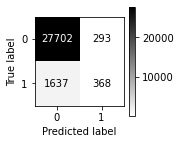

In [75]:
#default threshold
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(clf.score(X_test,y_test))
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(clf, X_test, y_test, cmap='gray_r', ax=ax)
print(classification_report(y_test, y_pred))

In [77]:
#find the best threshold
from sklearn.metrics import roc_curve
# calculate roc curves
y_hat = clf.predict_proba(X_test)[:,1]
roc_cureve_df = pd.DataFrame(roc_curve(y_test,y_hat))
fpr, tpr, thresholds = roc_curve(y_test,y_hat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr*(1-fpr))
ix = np.argmax(gmeans)
print('Best thresh hold: {} , best G-Mean: {},'.format(thresholds[ix],gmeans[ix]))

Best thresh hold: 0.06240190484133052 , best G-Mean: 0.7840192481643246,


In [78]:
from sklearn.metrics import recall_score
y_pred = clf.predict_proba(X_test)[:,1] > thresholds[ix]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(f'In conlusion, the best theshold is {round(thresholds[ix],3)}, at which level the recall rate is {round(recall_score(y_test, y_pred),3)}')

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     27995
           1       0.21      0.78      0.33      2005

    accuracy                           0.78     30000
   macro avg       0.59      0.78      0.60     30000
weighted avg       0.93      0.78      0.84     30000

[[21976  6019]
 [  436  1569]]
In conlusion, the best theshold is 0.062, at which level the recall rate is 0.783


### Feature importance

In [329]:
clf.feature_importances_

array([204, 180,  98, 110, 171, 126,  83,  80,  89,  37,   4, 162])

<AxesSubplot:>

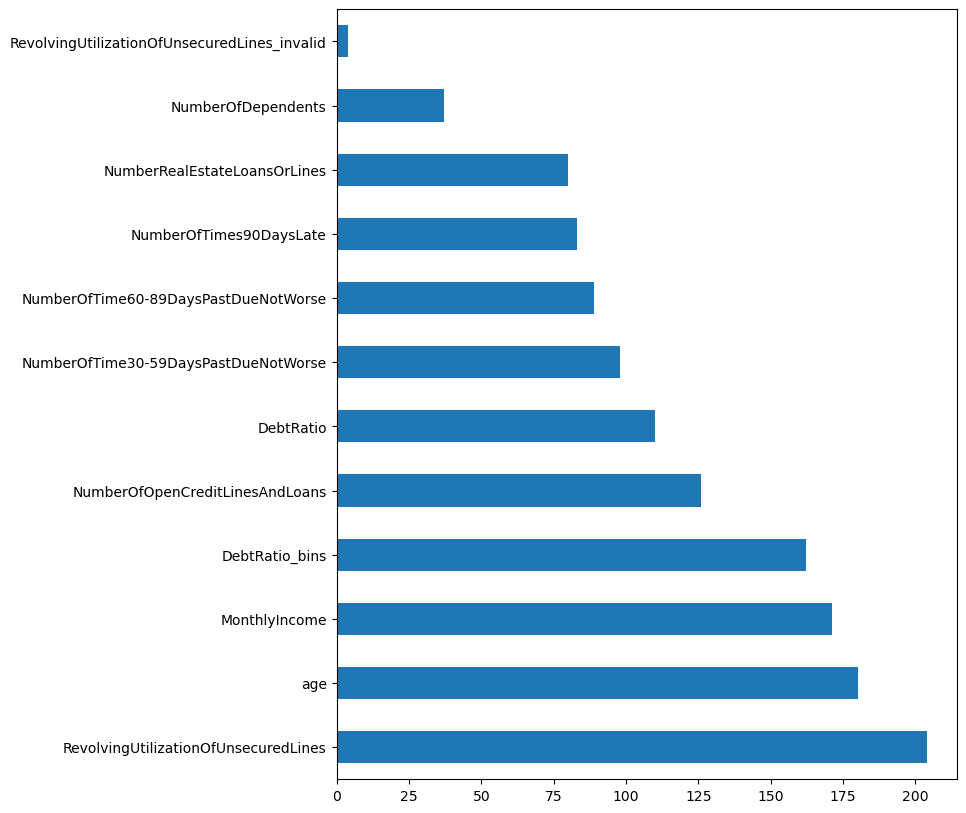

In [330]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))


##### Shapley value

In [79]:
import shap
shap.initjs()

In [83]:
# Fits the explainer
explainer = shap.TreeExplainer(clf)
# Calculates the SHAP values 
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


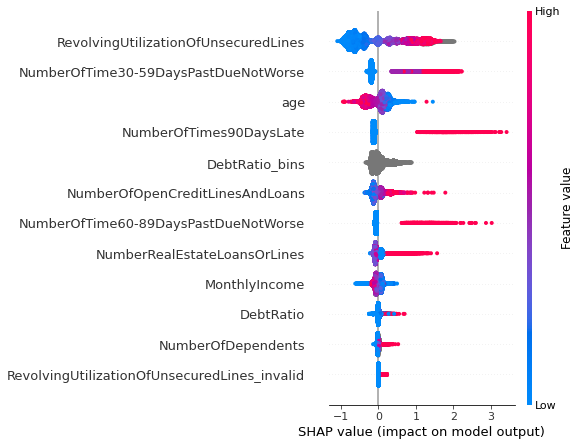

In [84]:
shap.summary_plot(shap_values[1], X_test)

In [86]:
shap.force_plot(explainer.expected_value[1], np.array(shap_values)[1,0,:], X_test.iloc[0,:])